<a href="https://colab.research.google.com/github/akaicomet/Portuguese-Bank-Marketing/blob/master/Variable_Scaling_and_Redemensioning_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sodapy
!pip install tbvaccine 
!pip install MulticoreTSNE
!pip install scikit-learn

    100% |████████████████████████████████| 829kB 20.7MB/s 
    100% |████████████████████████████████| 61kB 21.5MB/s 
  Running setup.py bdist_wheel for future ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
    100% |█████████

In [0]:
from io import StringIO
from pandas.compat import StringIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
from io import BytesIO
import numpy as np
import random
from sodapy import Socrata
import seaborn as sb
from tqdm import tqdm
import warnings
from textwrap import wrap

# 1. Copy python files from GItHub repository to local

In [3]:
!git clone https://github.com/akaicomet/akaicomet_Utility.git
!git clone https://github.com/akaicomet/akaicomet_Chart.git
!git clone https://github.com/akaicomet/akaicomet_ML.git


Cloning into 'akaicomet_Utility'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
Cloning into 'akaicomet_Chart'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 52 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.
Cloning into 'akaicomet_ML'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 133 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (133/133), 40.81 KiB | 469.00 KiB/s, done.
Resolving deltas: 100% (47/47), done.


# 2. Run .py files in local

In [0]:
%run -i /content/akaicomet_Utility/ErrorHandling.py
%run -i /content/akaicomet_Chart/X-Ray_Scan.py
%run -i /content/akaicomet_Chart/akaicomet_Chart.py
%run -i /content/akaicomet_ML/ML_Init.py
%run -i /content/akaicomet_ML/ML_Auto.py
%run -i /content/akaicomet_ML/AutoFeatureEngineering.py

# 3. Check File Name

In [5]:
resp = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip')
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.namelist()

['bank-additional/',
 'bank-additional/.DS_Store',
 '__MACOSX/',
 '__MACOSX/bank-additional/',
 '__MACOSX/bank-additional/._.DS_Store',
 'bank-additional/.Rhistory',
 'bank-additional/bank-additional-full.csv',
 'bank-additional/bank-additional-names.txt',
 'bank-additional/bank-additional.csv',
 '__MACOSX/._bank-additional']

# 4. Unzip csv file and Create DataFrame

In [0]:
url = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip")
zf = ZipFile(BytesIO(url.read()))
df = pd.read_csv(zf.open('bank-additional/bank-additional-full.csv'), sep = ';', header = 0)

# 5. Binalize Target Data and One Hot Encoding Data

In [0]:
y_train = df[df.poutcome != 'nonexistent' ].sample(n=5000, random_state=0)['poutcome']#.as_matrix()
y_train = y_train.map({'success': 1, 'failure': 0})
X_train = pd.get_dummies(df[df.poutcome != 'nonexistent' ].sample(n=5000, random_state=0).loc[:, df.columns != 'poutcome'])

# 6. Redemensioning Data

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input d

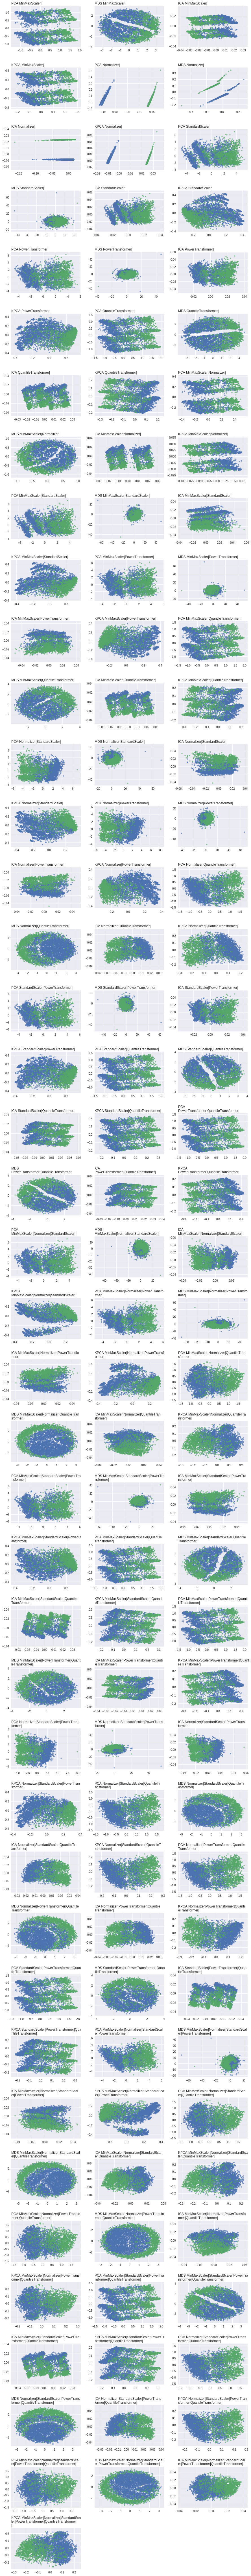

In [8]:
scaling_def = {'MinMaxScaler': MinMaxScaler(),'Normalizer': Normalizer(),'StandardScaler': StandardScaler(),'PowerTransformer':PowerTransformer(),'QuantileTransformer':QuantileTransformer()}
redemensioning_def = {'PCA': PCA(n_components=2),'MDS': MDS(n_components=2),'ICA': FastICA(n_components=2),'KPCA': KernelPCA(n_components=2, kernel='rbf')}


XRayChart(scaling_def,redemensioning_def, X_train, y_train)